In [1]:
import sys
sys.path.append('../../../')
import cxsystem2.neurodynlib as nd
from brian2.units import *
import brian2 as b2
import matplotlib.pyplot as plt

#b2.codegen.target = 'numpy'

# Exporting and importing models

## Exporting parameters

Suppose we want to tune the parameters of a particular neuron model and then save them for later use. Here we hand-tune the response of an AdEx neuron to current injection of 150 picoamps. Our target is that is should fire 10 spikes during 500ms of stimulation.

In [2]:
x = nd.AdexNeuron()

In [3]:
x.get_neuron_equations()

dvm/dt = (DeltaT*gL*exp((-VT + vm)/DeltaT) + gL*(EL - vm) - w)/C : volt (unless refractory)
dw/dt = (a*(-EL + vm) - w)/tau_w : amp


Let's check the default parameters

In [4]:
x.get_neuron_parameters()

{'EL': -70. * mvolt,
 'V_res': -51. * mvolt,
 'VT': -50. * mvolt,
 'gL': 2. * nsiemens,
 'C': 10. * pfarad,
 'DeltaT': 2. * mvolt,
 'a': 0.5 * nsiemens,
 'b': 7. * pamp,
 'tau_w': 100. * msecond,
 'refractory_period': 2. * msecond,
 'Vcut': -30. * mvolt}

Then let's create the current injection

In [5]:
input = nd.input_factory.get_step_current(t_start=100, t_end=600, unit_time=ms, amplitude=150*pA)
statemon, spikemon = x.simulate_neuron(I_stim=input, simulation_time=700*ms)

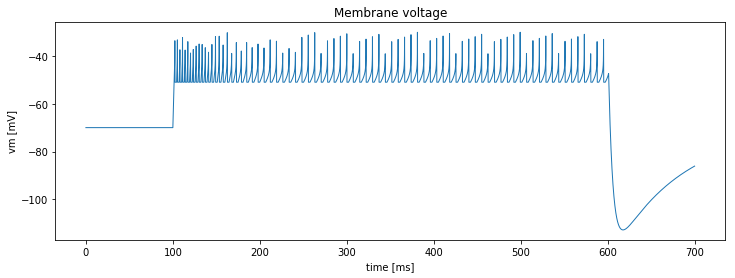

In [6]:
x.plot_vm(statemon)

Too many spikes! Let's then change some parameters and see how the neuron behaves

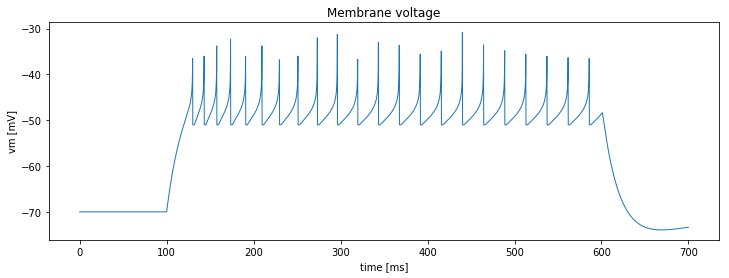

In [7]:
x.set_neuron_parameters(C=100*pF, gL=5*nS)
statemon, spikemon = x.simulate_neuron(I_stim=input, simulation_time=700*ms)
x.plot_vm(statemon)

Let's still add a bit more spike adaptation (parameter b) and see if we are happy with the result...

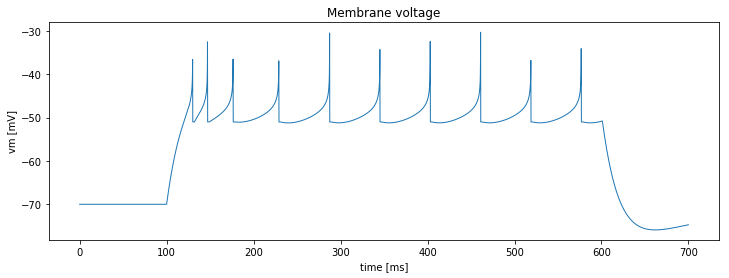

In [8]:
x.set_neuron_parameters(b=25*pA)
statemon, spikemon = x.simulate_neuron(I_stim=input, simulation_time=700*ms)
x.plot_vm(statemon)

Perfect! Now we have a neuron firing 10 spikes in response to current injection at 150 pA for 500ms. Let's save the parameters to a file.

In [9]:
x.save_json('my_adex_neuron.json')

## Importing parameters

Loading parameters from a file saved previously is easy:

In [10]:
y = nd.AdexNeuron()
y.read_json('my_adex_neuron.json')

In [11]:
y.get_neuron_parameters()

{'EL': -70. * mvolt,
 'V_res': -51. * mvolt,
 'VT': -50. * mvolt,
 'gL': 5. * nsiemens,
 'C': 100. * pfarad,
 'DeltaT': 2. * mvolt,
 'a': 0.5 * nsiemens,
 'b': 25. * pamp,
 'tau_w': 100. * msecond,
 'refractory_period': 2. * msecond,
 'Vcut': -30. * mvolt}

You might also want to compile a single json file with several neuron models. Let's for example check parameters compiled from [Table 1](https://link.springer.com/article/10.1007/s00422-008-0264-7#Tab1) of the paper Naud et al. (2008) Firing patterns in the adaptive exponential integrate-and-fire model.

In [12]:
naud2008_json = 'naud2008_table1.json'
y.read_json(naud2008_json)

If you don't provide a name, _read_\__json()_ reads the parameters of the first neuron in the file

In [13]:
y.neuron_name

'cNA'

You can see which neurons are available in the json:

In [22]:
y.list_neurons_in_json(naud2008_json)

['cNA',
 'cAD',
 'RS',
 'Fig_4a',
 'Fig_4b',
 'Fig_4c',
 'Fig_4d',
 'Fig_4e',
 'Fig_4f',
 'Fig_4g',
 'Figs_4h']

Let's then load the parameters of a regular spiking (RS) neuron and stimulate it as before:

In [27]:
y.read_json(naud2008_json, 'RS')

In [28]:
y.get_neuron_parameters()

{'C': 104. * pfarad,
 'gL': 4.3 * nsiemens,
 'EL': -65. * mvolt,
 'VT': -52. * mvolt,
 'DeltaT': 0.8 * mvolt,
 'a': -0.8 * nsiemens,
 'tau_w': 88. * msecond,
 'b': 65. * pamp,
 'V_res': -53. * mvolt,
 'refractory_period': 2. * msecond,
 'Vcut': 20. * mvolt}

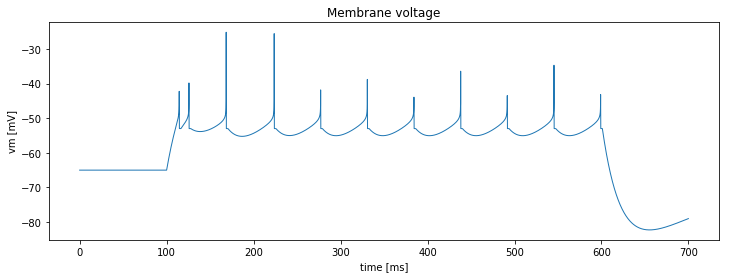

In [29]:
statemon, spikemon = y.simulate_neuron(I_stim=input, simulation_time=700*ms)
y.plot_vm(statemon)

For comparison, let's also stimulate the non-accomodating (cNA) model:

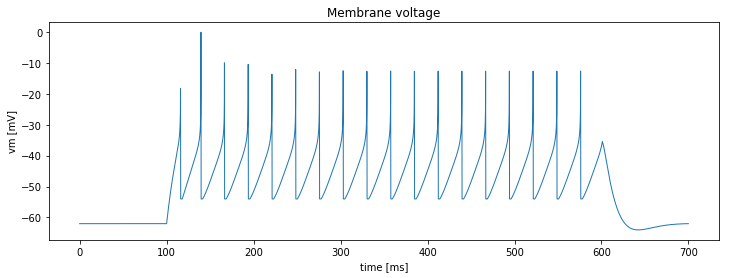

In [30]:
y.read_json(naud2008_json, 'cNA')
statemon, spikemon = y.simulate_neuron(I_stim=input, simulation_time=700*ms)
y.plot_vm(statemon)